Para entender melhor os padrões de vendas e identificar oportunidades de crescimento, um conjunto de dados da empresa XYZ foi analisado. Isso inclui dados sobre pedidos, produtos e clientes.

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar os dados
dados = pd.read_csv('dados\dataset-store.csv')

# Remover linhas com dados ausentes
dados = dados.dropna()

O conjunto de dados contém informações sobre aproximadamene 10.000 pedidos realizados ao longo de 4 anos (2014-2017), abrangendo diversos produtos em 3 categorias diferentes, vendidos para clientes nos Estados Unidos.

In [3]:

dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
6,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AR-10002833,Office Supplies,Newell 322,7.2800,4.0


Primeiramente os dados são preparados/convertidos para formatos que possam ser usados pelas próximas operações. 

In [4]:
# Converter a coluna 'Data_Pedido' para datetime
dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'])

# Criar uma coluna 'Mes' e 'Ano' a partir da 'Data_Pedido'
dados['Mes'] = dados['Data_Pedido'].dt.month
dados['Ano'] = dados['Data_Pedido'].dt.year

# Agrupar as vendas por mês e ano
vendas_mensais = dados.groupby([dados['Ano'], dados['Mes']])['Valor_Venda'].sum().reset_index()

Começando por algumas informações valiosas sobre o desempenho geral das vendas, como o faturamento total, o volume de pedidos e o valor médio gasto por pedido.

In [5]:
# Receita Total
receita_total = dados['Valor_Venda'].sum()
print(f"Receita Total: $ {receita_total:.2f}")

# Número de Pedidos
num_pedidos = dados['ID_Pedido'].nunique()
print(f"Número de Pedidos: {num_pedidos}")

# Valor Médio do Pedido
valor_medio_pedido = dados.groupby('ID_Pedido')['Valor_Venda'].sum().mean()
print(f"Valor Médio do Pedido: $ {valor_medio_pedido:.2f}")

Receita Total: $ 2296206.96
Número de Pedidos: 5008
Valor Médio do Pedido: $ 458.51


Ao analisar as vendas mensais, observou-se um padrão sazonal distinto. Os meses de [Setembro, Novembro, e Dezembro] geralmente apresentam os [maiores volumes de vendas], provavelmente devido às festas de fim de ano e período de Black Friday. Por outro lado, os meses de [Janeiro e Fevereiro] têm as menores vendas, o que pode ser explicado pela "ressaca" de gastos de fim de ano, ausência de feriados e até pela vindoura declaração de imposto de Renda (período com menor gasto).

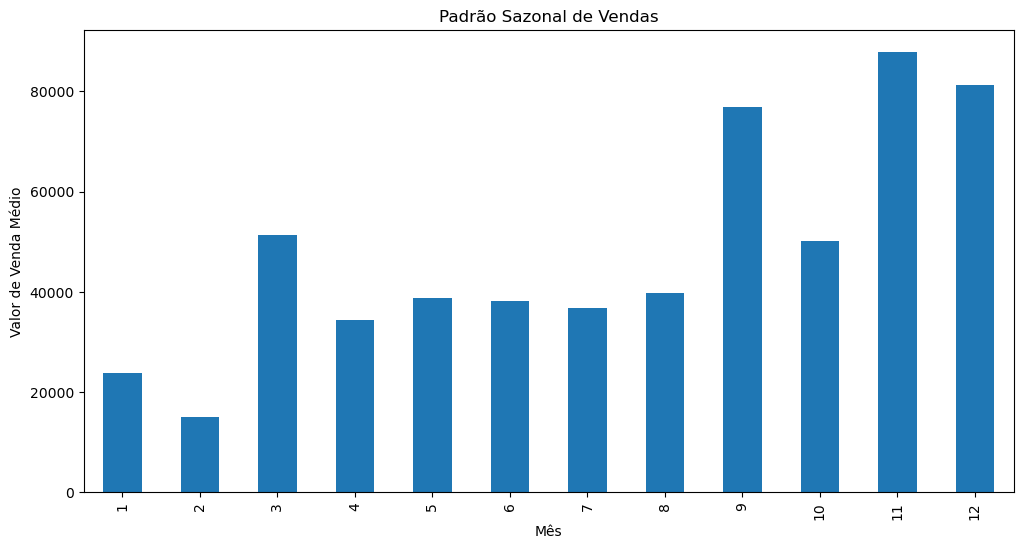

In [6]:
# Média das vendas por mês
media_mes = vendas_mensais.groupby('Mes')['Valor_Venda'].mean()

# Plotar a média das vendas por mês
media_mes.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Mês')
plt.ylabel('Valor de Venda Médio')
plt.title('Padrão Sazonal de Vendas')
plt.show()

Ao olhar para as vendas anuais, podemos ver uma tendência [crescente] nos últimos anos.

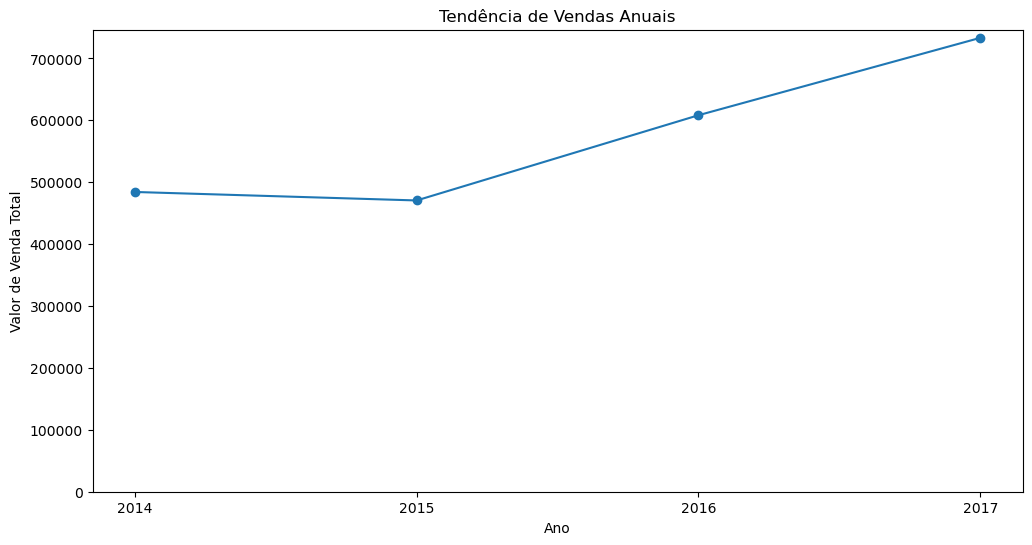

In [7]:
# Agrupar as vendas por ano
vendas_anuais = dados.groupby(dados['Data_Pedido'].dt.year)['Valor_Venda'].sum()

# Converter o índice em uma lista de anos inteiros
anos = [int(ano) for ano in vendas_anuais.index]

# Criar um gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(anos, vendas_anuais.values, marker='o')

# Configurar os eixos
ax.set_xlabel('Ano')
ax.set_ylabel('Valor de Venda Total')
ax.set_title('Tendência de Vendas Anuais')
ax.set_xticks(anos)  # Definir as posições dos rótulos do eixo X
ax.set_ylim(bottom=0)  # Definir o limite inferior do eixo Y como 0

plt.show()

A decomposição da série temporal revelou uma tendência de crescimento, e um padrão sazonal favorável nos fins de anos. Esses componentes ajudam a entender melhor os fatores que influenciam as vendas e a planejar de forma mais eficaz.

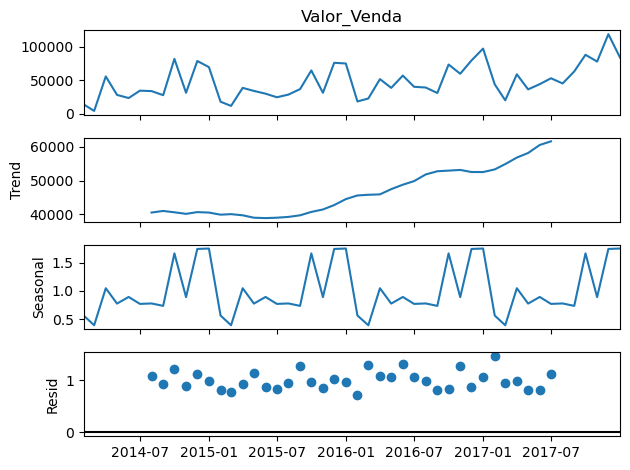

In [8]:
# Carregar os dados novamente
dados2 = pd.read_csv('dados\dataset-store.csv', parse_dates=['Data_Pedido'])

# Agrupar as vendas por mês
vendas_mensais = dados2.groupby(pd.Grouper(key='Data_Pedido', freq='M'))['Valor_Venda'].sum().reset_index()

# Converter os dados em uma série temporal
serie_vendas = vendas_mensais.set_index('Data_Pedido')['Valor_Venda'].resample('M').sum()

# Decompor a série
decomposicao = seasonal_decompose(serie_vendas, model='multiplicative')

# Plotar os componentes
decomposicao.plot()
plt.show()

A seguir, os dados foram analisados quanto à distribuição de vendas, tanto por Segmento, quanto por Região da venda e por Categoria de produto.

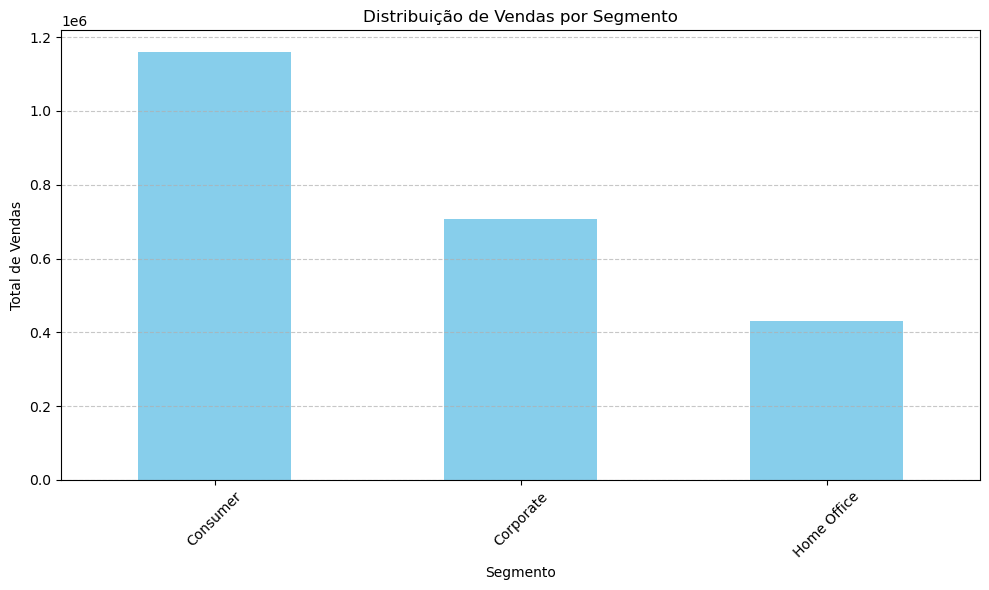

In [9]:
# Agrupar dados por segmento e calcular a soma das vendas
vendas_por_segmento = dados.groupby('Segmento')['Valor_Venda'].sum()

# Plotar um gráfico de barras para visualizar a distribuição de vendas por segmento
vendas_por_segmento.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribuição de Vendas por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

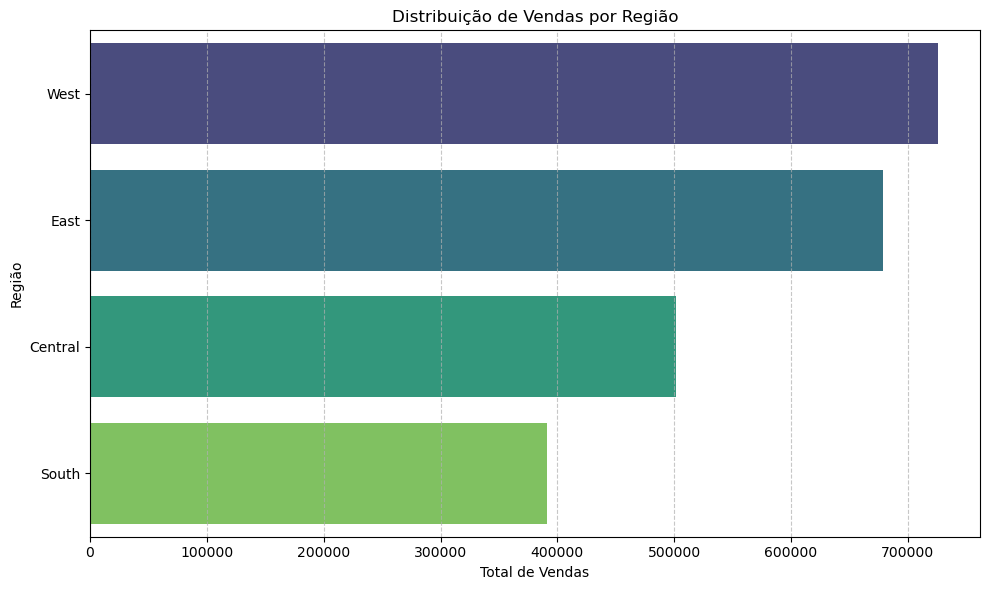

In [10]:
# Agrupar dados por país e calcular a soma das vendas
vendas_por_pais = dados.groupby('Regiao')['Valor_Venda'].sum().sort_values(ascending=False)

# Plotar um gráfico de barras horizontais para visualizar a distribuição de vendas por país
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_pais.values, y=vendas_por_pais.index, palette='viridis')
plt.title('Distribuição de Vendas por Região')
plt.xlabel('Total de Vendas')
plt.ylabel('Região')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


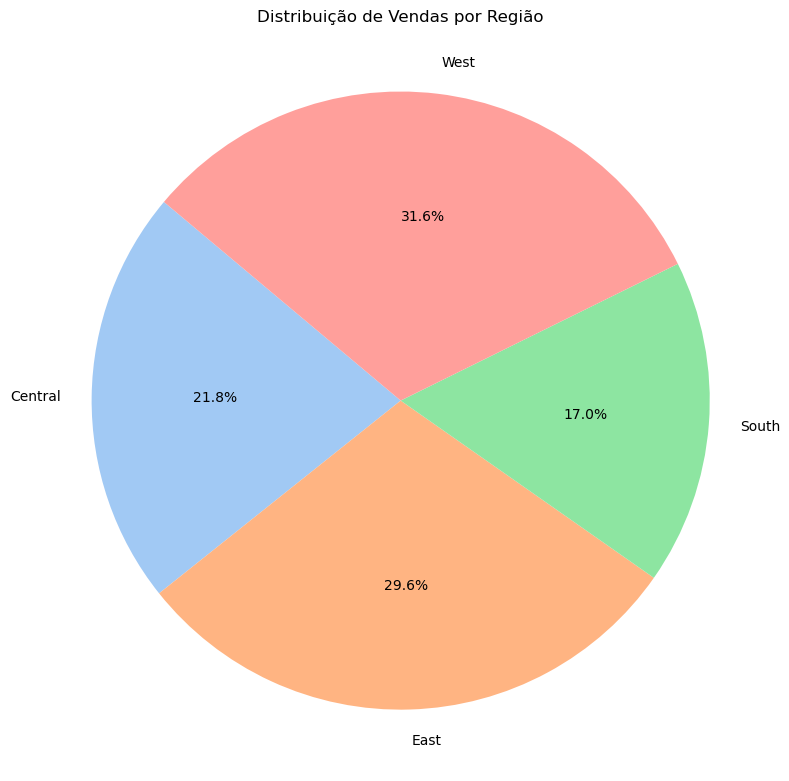

In [11]:
# Agrupar dados por região e calcular a soma das vendas
vendas_por_regiao = dados.groupby('Regiao')['Valor_Venda'].sum()

# Plotar um gráfico de pizza para visualizar a distribuição de vendas por região
plt.figure(figsize=(8, 8))
plt.pie(vendas_por_regiao, labels=vendas_por_regiao.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribuição de Vendas por Região')
plt.axis('equal')
plt.tight_layout()
plt.show()

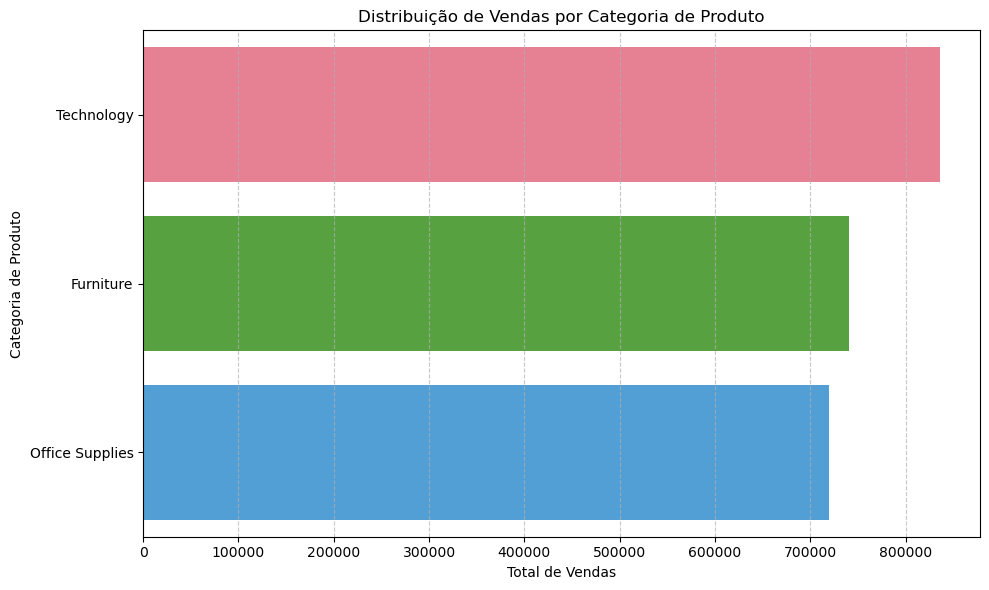

In [12]:
# Agrupar dados por categoria de produto e calcular a soma das vendas
vendas_por_categoria = dados.groupby('Categoria')['Valor_Venda'].sum().sort_values(ascending=False)

# Plotar um gráfico de barras horizontais para visualizar a distribuição de vendas por categoria de produto
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_categoria.values, y=vendas_por_categoria.index, palette='husl')
plt.title('Distribuição de Vendas por Categoria de Produto')
plt.xlabel('Total de Vendas')
plt.ylabel('Categoria de Produto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Por fim, buscamos o segmento com maior potencial para vendas.

In [20]:
# Agrupar por Segmento e somar Valor_Venda e Quantidade
vendas_por_segmento = dados.groupby('Segmento')[['Valor_Venda', 'Quantidade']].sum().reset_index()

# Ordenar por Valor_Venda decrescente
vendas_por_segmento_valor = vendas_por_segmento.sort_values(by='Valor_Venda', ascending=False)
vendas_por_segmento_valor[['Valor_Venda', 'Quantidade']] = vendas_por_segmento_valor[['Valor_Venda', 'Quantidade']].round(decimals=2)

# Ordenar por Quantidade decrescente
vendas_por_segmento_quantidade = vendas_por_segmento.sort_values(by='Quantidade', ascending=False)
vendas_por_segmento_quantidade[['Valor_Venda', 'Quantidade']] = vendas_por_segmento_quantidade[['Valor_Venda', 'Quantidade']].round(decimals=2)

# Exibir os resultados
print("Segmentos com mais vendas por Valor de Venda:")
print(vendas_por_segmento_valor)

print("\nSegmentos com mais vendas por Quantidade:")
print(vendas_por_segmento_quantidade)

Segmentos com mais vendas por Valor de Venda:
      Segmento  Valor_Venda  Quantidade
0     Consumer   1160407.44     19516.0
1    Corporate    706146.37     11608.0
2  Home Office    429653.15      6744.0

Segmentos com mais vendas por Quantidade:
      Segmento  Valor_Venda  Quantidade
0     Consumer   1160407.44     19516.0
1    Corporate    706146.37     11608.0
2  Home Office    429653.15      6744.0


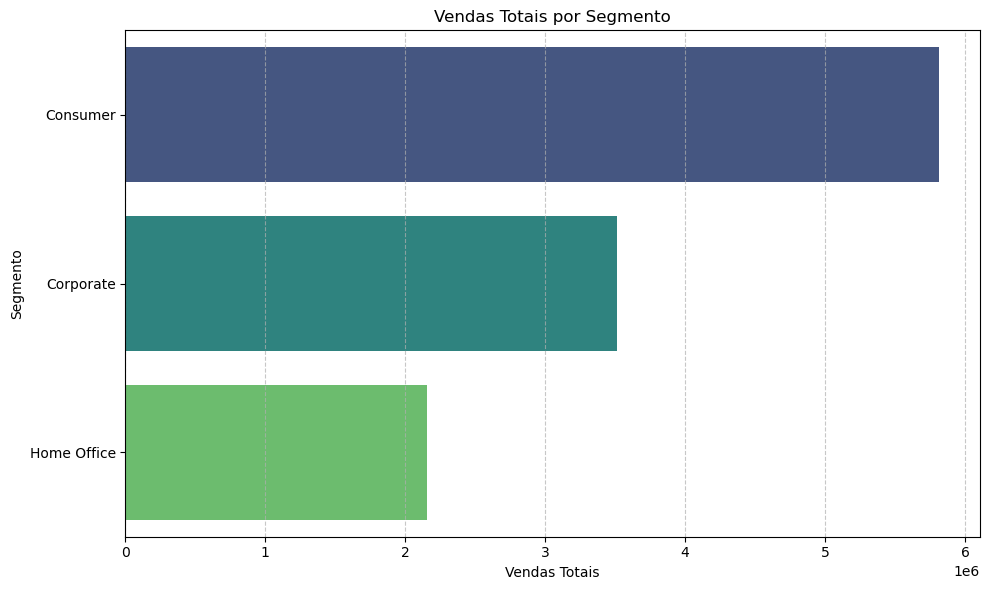

In [16]:
# Calcular as vendas totais (valor de venda * quantidade) por segmento
dados['Vendas_Totais'] = dados['Valor_Venda'] * dados['Quantidade']
vendas_totais_por_segmento = dados.groupby('Segmento')['Vendas_Totais'].sum()

# Plotar um gráfico de barras para visualizar as vendas totais por segmento
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_totais_por_segmento.values, y=vendas_totais_por_segmento.index, palette='viridis')
plt.title('Vendas Totais por Segmento')
plt.xlabel('Vendas Totais')
plt.ylabel('Segmento')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
